In [54]:
import numpy as np
import matplotlib.pyplot as plt

from modules.game import Game
from modules.node import CongklakNode
from modules.state import CongklakState
from modules.strategies import (
    simple_strategy,
    random_strategy,
    maximize_house_strategy
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Kalo berhenti di rumah sendiri
    - bonus move
- Kalo berhenti di lubang sendiri
    - kalo kosong, ambil punya lawan & kita (1), giliran stop
    - kalo ada, ambil yg di situ doang, lanjut lagi
- Kalo berhenti di lubang lawan
    - kalo kosong, berhenti
    - kalo ada, ambil yg di situ doang, lanjut lagi

# Run

In [55]:
def print_path(game):
    cur_node = game.final_node
    path = [cur_node]
    while cur_node.parent != cur_node.node_id:
        cur_node = game.node_list[cur_node.parent]
        path.append(cur_node)

    print('Path to final state:')
    path = list(reversed(path))
    for i, node in enumerate(path):
        if i > 0:
            print(f'Choose action: {node.action}, result:')
        print(f'\n> Now turn of', node.state)
    print('Finish')

In [56]:
state = CongklakState()
print(state)

state = state.action(1)
print(state)

state = state.action(2)
print(state)

Player: 0, board:
[[0 7 7 7 7 7 7 7]
 [0 7 7 7 7 7 7 7]]
Player: 1, board:
[[2 0 8 8 8 8 8 8]
 [0 0 8 8 8 8 8 8]]
Player: 0, board:
[[ 2  1  4  0 15 15 15  1]
 [14  7  3  0  1  3  2 15]]


In [78]:
player = 0
print_every = 100_000

np.random.seed(0)
initial_state = CongklakState(player=player, holes=7, init_beads=7)
game = Game(
    policies=[random_strategy, random_strategy],
    initial_state=initial_state,
    print_every=print_every,
    player=player,
    verbose=True,
    max_total_visited_states=2
)

game.play()

[RESULT]
> Total observed states: 3
> Final state:
Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]
> Winner: player 0 with 59 beads!!
> Total steps to win: 2


In [79]:
game.final_state

Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]

In [88]:
on_player = 0
total_play = 1
while on_player != 1-player:
  game = Game(
            policies=[maximize_house_strategy, maximize_house_strategy],
            initial_state=initial_state,
            player=player,
            max_total_visited_states=total_play
        )
  game.play()
  on_player = game.final_state.player
  total_play+=1


[RESULT]
> Total observed states: 2
> Final state:
Player: 1, board:
[[2 0 8 8 8 8 8 8]
 [0 0 8 8 8 8 8 8]]
> Winner: player 0 with 50 beads!!
> Total steps to win: 1


In [87]:
total_play

4

In [62]:
# print_path(game)

In [99]:
def maximize_diff_score_strategy(state: CongklakState):
    next_states = []
    for i, action_num in enumerate(state.valid_actions()):
        next_state = state.action(action_num)
        on_player = state.player
        total_play = 2
        while on_player != 1-state.player:
            game = Game(
                        policies=[maximize_house_strategy, maximize_house_strategy],
                        initial_state=next_state,
                        player=state.player,
                        max_total_visited_states=total_play
                    )
            game.play()
            on_player = game.final_state.player
            total_play+=1
        next_boards = game.final_state.board
        diff = next_boards[state.player, 0] - next_boards[1-state.player, 0]
        next_states.append((diff, action_num, next_state))
    return next_states

In [100]:
maximize_diff_score_strategy(initial_state)

[RESULT]
> Total observed states: 3
> Final state:
Player: 1, board:
[[12  0  0  1 16 16 16  0]
 [14  0  0  1  2  4  0 16]]
> Winner: player 0 with 61 beads!!
> Total steps to win: 2
[RESULT]
> Total observed states: 3
> Final state:
Player: 0, board:
[[ 4  1  3 10 10  0 10 10]
 [ 0  2  3  1 11 11 11 11]]
> Winner: player 1 with 50 beads!!
> Total steps to win: 2
[RESULT]
> Total observed states: 4
> Final state:
Player: 1, board:
[[10  1  0 11 11  1  0 11]
 [ 0  3  0  2 12 12 12 12]]
> Winner: player 1 with 53 beads!!
> Total steps to win: 3
[RESULT]
> Total observed states: 3
> Final state:
Player: 0, board:
[[ 2 13  1  4 12  0  1 12]
 [ 4  2  2  3 13  3 13 13]]
> Winner: player 1 with 53 beads!!
> Total steps to win: 2
[RESULT]
> Total observed states: 4
> Final state:
Player: 1, board:
[[ 4  2  4  7 15  3  4 15]
 [ 4  5  5  6 16  6  1  1]]
> Winner: player 0 with 54 beads!!
> Total steps to win: 3
[RESULT]
> Total observed states: 3
> Final state:
Player: 1, board:
[[17  1  0 12  4

[(-2,
  1,
  Player: 1, board:
  [[2 0 8 8 8 8 8 8]
   [0 0 8 8 8 8 8 8]]),
 (10,
  2,
  Player: 1, board:
  [[2 8 0 8 8 8 8 8]
   [0 8 0 8 8 8 8 8]]),
 (0,
  3,
  Player: 1, board:
  [[2 8 8 0 8 8 8 8]
   [0 8 8 0 8 8 8 8]]),
 (14,
  4,
  Player: 1, board:
  [[2 8 8 8 0 8 8 8]
   [0 8 8 8 0 8 8 8]]),
 (2,
  5,
  Player: 1, board:
  [[2 8 8 8 8 0 8 8]
   [0 8 8 8 8 0 8 8]]),
 (2,
  6,
  Player: 1, board:
  [[2 8 8 8 8 8 0 8]
   [0 8 8 8 8 8 0 8]]),
 (-2,
  7,
  Player: 1, board:
  [[2 8 8 8 8 8 8 0]
   [0 8 8 8 8 8 8 0]])]

In [22]:
board = np.array([
    [2, 8, 8, 8, 8, 0, 8, 8],
    [0, 8,8,8,8, 0, 8, 8]
])
state = CongklakState(player=1, board=board, verbose=False)
state = state.action(3)
state

Player: 1, board:
[[ 2 11 11 11  2  0 11 11]
 [ 3 10  0  2 11  1 11  1]]

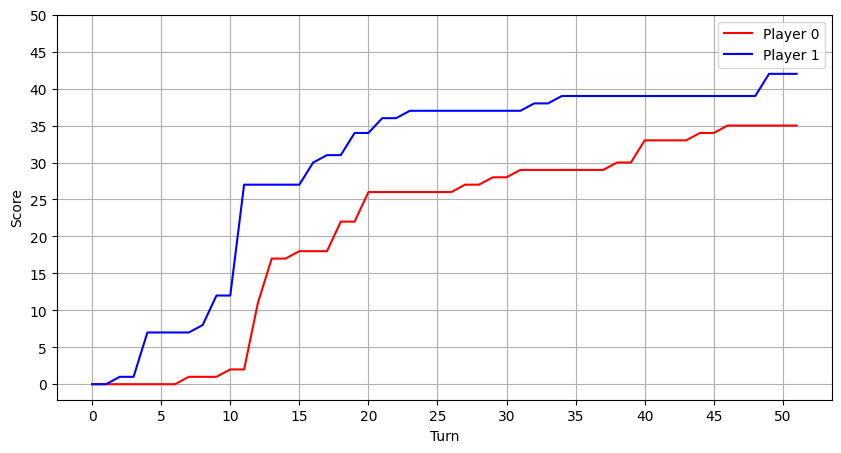

In [ ]:
last_board = final_node.state.board
last_board[0,0] - last_board[0,1]


In [43]:
score_list = [mhs[0] for mhs in maximize_house_strategy(initial_state)]
score_list.index(max(score_list))

0

In [52]:
def maximize_diff_score_strategy(state: CongklakState):
    next_states = []
    for i, action_num in enumerate(state.valid_actions()):
        next_state = state.action(action_num)
        # score_list = []
        # for value, next_action_num, next_next_state in maximize_house_strategy(next_state):
        #     if (next_next_state.player == state.player):
        #         score_list.append(value)
        # next_action_num = score_list.index(max(score_list))
        # next_next_state = state.action(next_action_num + 1)
        # next_board = next_next_state.board
        # diff = next_board[state.player,0] - next_board[1-state.player,0]
        diff = 0
        next_states.append((-1 * diff, action_num, next_state))
    return next_states

In [53]:
maximize_diff_score_strategy(initial_state)

[(0,
  1,
  Player: 0, board:
  [[0 8 7 7 7 7 7 7]
   [0 0 8 8 8 8 8 8]]),
 (0,
  2,
  Player: 0, board:
  [[0 8 8 7 7 7 7 7]
   [0 7 0 8 8 8 8 8]]),
 (0,
  3,
  Player: 0, board:
  [[0 8 8 8 7 7 7 7]
   [0 7 7 0 8 8 8 8]]),
 (0,
  4,
  Player: 0, board:
  [[0 8 8 8 8 7 7 7]
   [0 7 7 7 0 8 8 8]]),
 (0,
  5,
  Player: 0, board:
  [[0 8 8 8 8 8 7 7]
   [0 7 7 7 7 0 8 8]]),
 (0,
  6,
  Player: 0, board:
  [[0 8 8 8 8 8 8 7]
   [0 7 7 7 7 7 0 8]]),
 (0,
  7,
  Player: 0, board:
  [[0 8 8 8 8 8 8 8]
   [0 7 7 7 7 7 7 0]])]

In [6]:
initial_state = CongklakState(player=player, holes=7, init_beads=7)
maximize_house_strategy(initial_state)

[((0, 0),
  1,
  Player: 1, board:
  [[0 0 8 8 8 8 8 8]
   [0 8 7 7 7 7 7 7]]),
 ((0, 1),
  2,
  Player: 1, board:
  [[0 7 0 8 8 8 8 8]
   [0 8 8 7 7 7 7 7]]),
 ((0, 2),
  3,
  Player: 1, board:
  [[0 7 7 0 8 8 8 8]
   [0 8 8 8 7 7 7 7]]),
 ((0, 3),
  4,
  Player: 1, board:
  [[0 7 7 7 0 8 8 8]
   [0 8 8 8 8 7 7 7]]),
 ((0, 4),
  5,
  Player: 1, board:
  [[0 7 7 7 7 0 8 8]
   [0 8 8 8 8 8 7 7]]),
 ((0, 5),
  6,
  Player: 1, board:
  [[0 7 7 7 7 7 0 8]
   [0 8 8 8 8 8 8 7]]),
 ((0, 6),
  7,
  Player: 1, board:
  [[0 7 7 7 7 7 7 0]
   [0 8 8 8 8 8 8 8]])]

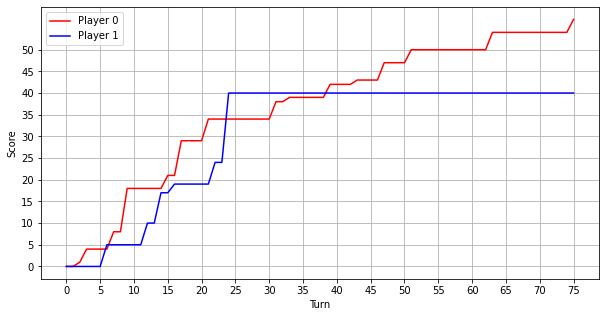

In [5]:
player_score_list = []
for node in path:
    state = node.state
    player_score_list.append((state.player, state.board[state.player, 0]))

score_turn_list = np.zeros((len(player_score_list), 2), dtype=np.int32)
for i, (player, score) in enumerate(player_score_list):
    score_turn_list[i, player] = score
    score_turn_list[i, 1 - player] = score_turn_list[i - 1, 1 - player]

plt.figure(figsize=(10, 5))
plt.plot(score_turn_list[:, 0], label='Player 0', color='red')
plt.plot(score_turn_list[:, 1], label='Player 1', color='blue')
plt.legend()
plt.xticks(np.arange(0, len(score_turn_list), 5))
plt.yticks(np.arange(0, 55, 5))
plt.xlabel('Turn')
plt.ylabel('Score')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()